# Summary

**[1] Review and supplement**<br>
- Variable names<br>
- Function – global variable and local variable
- Absolute path and relative path

**[2] Going further**<br>
- Lambda function, map, applymap, apply
- Other packages: numpy, scikit-learn

**[3] Exercises**<br>

## [1] Review and supplement

### [1.1] Variable names

- **Use build-in function name as variable name**

In [1]:
# Create a list named "list"
list = [1,2,3]

In [2]:
# Use function list() to create a list
mylist = list() 

TypeError: 'list' object is not callable

### [1.2] Variable names

- **Local variable**

In [3]:
def add_number(x, y):
    z = x + y

In [4]:
add_number(2, 5)
print(z)

NameError: name 'z' is not defined

- **Global variable**

In [5]:
threshold = 6

def grade(score):
    if score >= threshold:
        print("pass")
    else:
        print("fail")

In [6]:
grade(7)

pass


In [7]:
print(threshold)

6


- **Global variable and local variable with same name**

In [8]:
name = "Lucas"

def greeting():
    name = "Maya"
    print("Hi,", name)

In [9]:
greeting()

Hi, Maya


In [10]:
print(name)  

Lucas


## [2] Going further

### [2.1] Lambda function, map, applymap, apply

- **Lambda function:**

In [11]:
def add_10(a):
    return a + 10


add_10(5)

15

In [12]:
lambda a : a + 10

<function __main__.<lambda>(a)>

In [13]:
(lambda a : a + 10)(5)

15

- **Use lambda function in pandas - map**

In [14]:
import pandas as pd

In [15]:
score_df = pd.DataFrame({"score":[7, 5, 8 ,6 ,4]}, index =  ["S01","S02","S03","S04","S05"])
score_df

,score
S01,7
S02,5
S03,8
S04,6
S05,4


In [16]:
score_df["result"] = score_df.score.map(lambda score: "pass" if score >= 6 else "fail")
score_df

,score,result
S01,7,pass
S02,5,fail
S03,8,pass
S04,6,pass
S05,4,fail


- **Use lambda function in pandas - applymap**

In [17]:
temp_df = pd.DataFrame({"6AM":[12, 13, 13], "12AM":[15, 18, 19], "6PM":[10, 11, 13]}, index = ["Day1", "Day2","Day3"])
temp_df

,6AM,12AM,6PM
Day1,12,15,10
Day2,13,18,11
Day3,13,19,13


In [18]:
# Convert Celsius to Fahrenheit 
# Fahrenheit = Celsius * (9/5) +32 
temp_df = temp_df.applymap(lambda x: x*(9/5)+32)
temp_df

,6AM,12AM,6PM
Day1,53.6,59.0,50.0
Day2,55.4,64.4,51.8
Day3,55.4,66.2,55.4


- **Use lambda function in pandas - apply**

In [19]:
temp_df = pd.DataFrame({"6AM":[12, 13, 13], "12AM":[15, 18, 19], "6PM":[10, 11, 13]}, index = ["Day1", "Day2","Day3"])
temp_df

,6AM,12AM,6PM
Day1,12,15,10
Day2,13,18,11
Day3,13,19,13


In [20]:
temp_df["Range"] = temp_df.apply(lambda x: x.max()-x.min(), axis = 1)
temp_df

,6AM,12AM,6PM,Range
Day1,12,15,10,5
Day2,13,18,11,7
Day3,13,19,13,6


### [2.2] Other packages

- **numpy**

In [21]:
import numpy as np

In [22]:
# 1-dimensional array 
x = np.array([1, 2, 3])  
x

array([1, 2, 3])

In [23]:
# 2-dimensional array 
y = np.array([[1, 2, 3],
              [4, 5, 6]])  
y

array([[1, 2, 3],
       [4, 5, 6]])

In [24]:
# apply mathematical functions
print(np.log(x))
print(np.sqrt(x))

[0.         0.69314718 1.09861229]
[1.         1.41421356 1.73205081]


In [25]:
# matrix multiplication (same as y@x)
np.matmul(y,x)

array([14, 32])

- **sklearn**

In [26]:
customer_df = pd.read_csv('../dataset/customers.csv', index_col = ['CustomerID'])
customer_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [28]:
# Scale the data
X = customer_df[['Annual Income (k$)', 'Spending Score (1-100)']]
Xtr =  StandardScaler().fit_transform(X)

# Fitting the K-Means Clustering Algorithm with 5 clusters
km = KMeans(n_clusters = 5)
y = km.fit_predict(Xtr)

# Add cluster data to data frame
customer_df['clusters'] = y

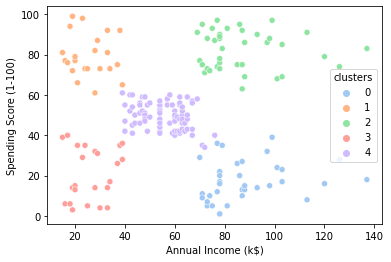

In [29]:
# Plot results
sns.scatterplot(data = customer_df, 
                y = 'Spending Score (1-100)', 
                x = 'Annual Income (k$)', 
                hue = 'clusters', palette = "pastel");

## [3] Exercises

Questions will be given in class.

In [17]:
list1 = ["apple", "yogurt", "yogurt", "salmon", "apple", "apple", "cheese"]
list2 = ['tea', 'juice', 'juice', 'grape', 'avocado', 'almond', 'juice', 'coffee', 'tea', 'coffee', 'tea', 'coffee']

In [23]:
def cart(item_list):
    item_set = set(item_list)
    
    for i in item_set:
        q = item_list.count(i)
        print("{}: {}".format(i, q))

In [24]:
cart(list1)

apple: 3
salmon: 1
cheese: 1
yogurt: 2


In [25]:
cart(list2)

juice: 3
coffee: 3
grape: 1
tea: 3
almond: 1
avocado: 1


In [27]:
s1 = pd.Series([1974 ,1414 ,1648 ,1497 ,1454 ,883 ,955],
              index = pd.to_datetime(["2021-11-01","2021-11-02","2021-11-03","2021-11-04","2021-11-05","2021-11-06","2021-11-07"]))
s1

2021-11-01    1974
2021-11-02    1414
2021-11-03    1648
2021-11-04    1497
2021-11-05    1454
2021-11-06     883
2021-11-07     955
dtype: int64

In [28]:
s2 = pd.Series([2387 ,1753 ,1966 ,1771 ,1784 ,1088 ,1057.],
              index = pd.to_datetime(["2021-11-08","2021-11-09","2021-11-10","2021-11-11","2021-11-12","2021-11-13","2021-11-14"]))
s2

2021-11-08    2387.0
2021-11-09    1753.0
2021-11-10    1966.0
2021-11-11    1771.0
2021-11-12    1784.0
2021-11-13    1088.0
2021-11-14    1057.0
dtype: float64

<AxesSubplot:>

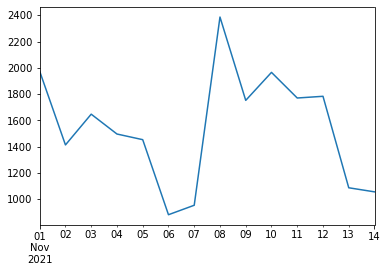

In [30]:
s3 = pd.concat([s1, s2])
s3.plot()

In [32]:
s3.sort_values(ascending = False)

2021-11-08    2387.0
2021-11-01    1974.0
2021-11-10    1966.0
2021-11-12    1784.0
2021-11-11    1771.0
2021-11-09    1753.0
2021-11-03    1648.0
2021-11-04    1497.0
2021-11-05    1454.0
2021-11-02    1414.0
2021-11-13    1088.0
2021-11-14    1057.0
2021-11-07     955.0
2021-11-06     883.0
dtype: float64